In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from tqdm import tqdm

In [2]:
# Input Dataset 

DM = pd.read_csv("C:\Data Raihan\Penelitian Threshold\Dataset\Malware Dataset\\MalwareDataset.csv") #DM--> Dataset Malware

In [3]:
DM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [4]:
#Memisahkan data benign dan data malwares
BenignData = DM[DM['classification'] == "benign"]
MalwareData = DM[DM['classification'] == "malware"]

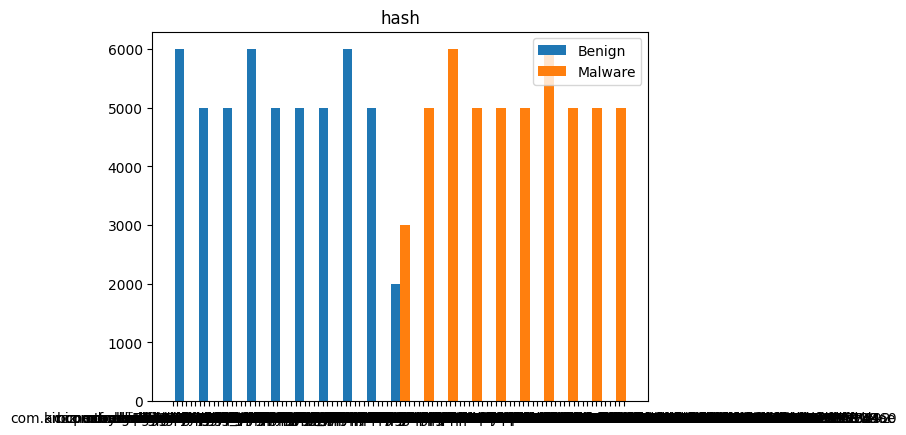

In [5]:
# Histogram penyebaran data benign dan malware pada fitur hash.
x = BenignData["hash"]
y = MalwareData["hash"]
bins = np.linspace(0, 100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("hash")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

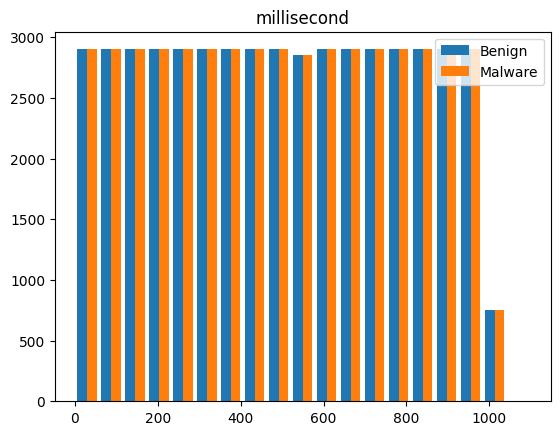

In [6]:
# Histogram penyebaran data benign dan malware pada fitur millisecond.
x = BenignData["millisecond"]
y = MalwareData["millisecond"]
bins = np.linspace(0, 1100, 20) # Berbeda karena mayoritas data bernilai 0 sampai 1100, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("millisecond")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

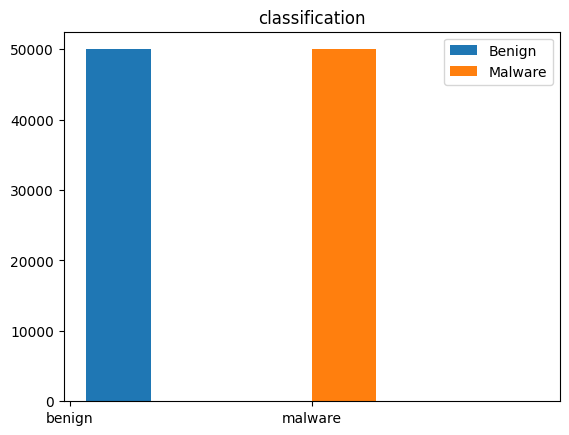

In [7]:
# Histogram penyebaran data benign dan malware pada fitur classification.
x = BenignData["classification"]
y = MalwareData["classification"]
bins = np.linspace(0, 2, 4) # Berbeda karena mayoritas data bernilai 0 sampai 2, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("classification")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

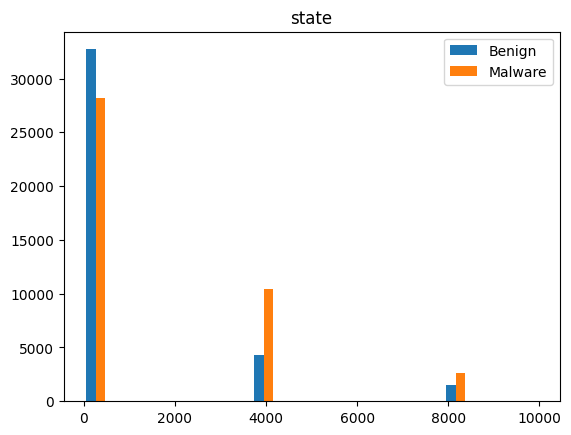

In [8]:
# Histogram penyebaran data benign dan malware pada fitur state.
x = BenignData["state"]
y = MalwareData["state"]
bins = np.linspace(0, 10000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("state")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

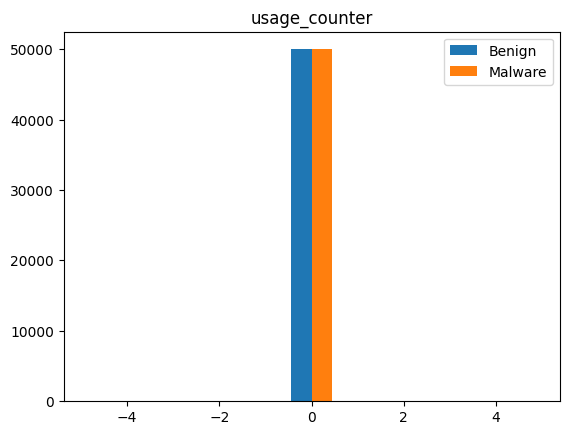

In [9]:
# Histogram penyebaran data benign dan malware pada fitur usage_counter.
x = BenignData["usage_counter"]
y = MalwareData["usage_counter"]
bins = np.linspace(-5, 5, 10) # Berbeda karena mayoritas data bernilai -5 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("usage_counter")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

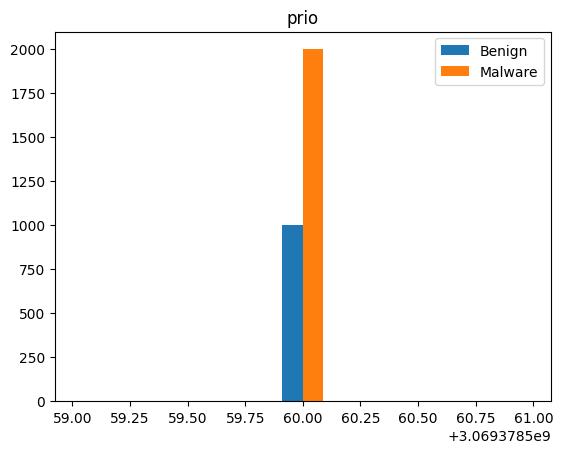

In [10]:
# Histogram penyebaran data benign dan malware pada fitur prio.
x = BenignData["prio"]
y = MalwareData["prio"]
bins = np.linspace(3069378559, 3069378561, 10) # Berbeda karena mayoritas data bernilai 3069378559 sampai 3069378561, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("prio")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

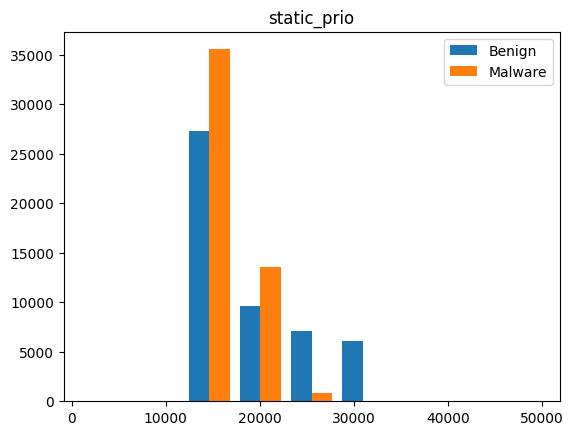

In [11]:
# Histogram penyebaran data benign dan malware pada fitur static_prio.
x = BenignData["static_prio"]
y = MalwareData["static_prio"]
bins = np.linspace(1000, 50000, 10) # Berbeda karena mayoritas data bernilai 1000 sampai 50000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("static_prio")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

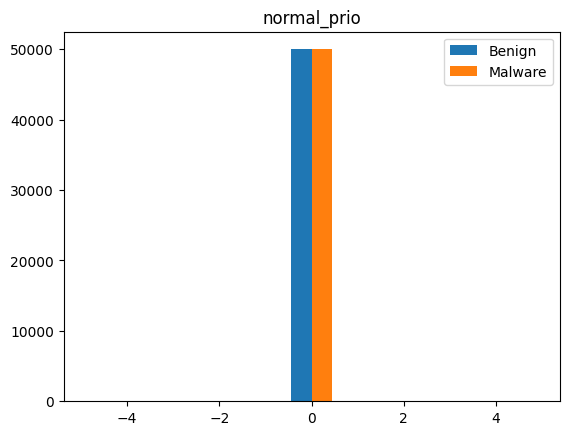

In [12]:
# Histogram penyebaran data benign dan malware pada fitur normal_prio.
x = BenignData["normal_prio"]
y = MalwareData["normal_prio"]
bins = np.linspace(-5, 5, 10) # Berbeda karena mayoritas data bernilai -5 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("normal_prio")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

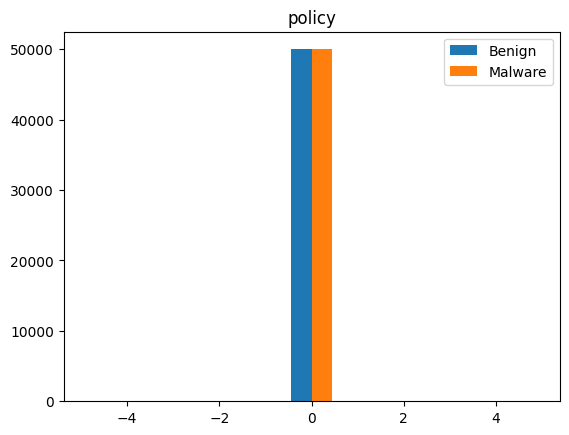

In [13]:
# Histogram penyebaran data benign dan malware pada fitur policy.
x = BenignData["policy"]
y = MalwareData["policy"]
bins = np.linspace(-5, 5, 10) # Berbeda karena mayoritas data bernilai -5 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("policy")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

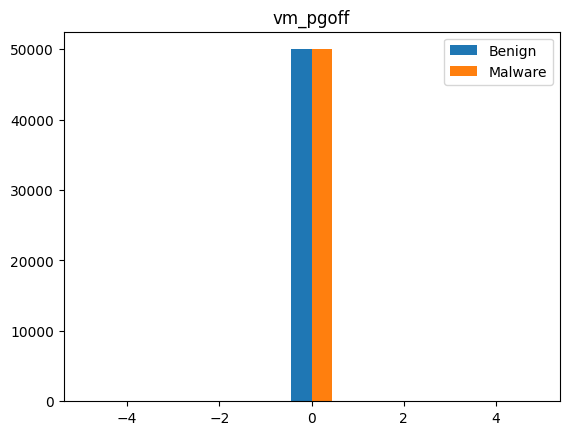

In [14]:
# Histogram penyebaran data benign dan malware pada fitur vm_pgoff.
x = BenignData["vm_pgoff"]
y = MalwareData["vm_pgoff"]
bins = np.linspace(-5, 5, 10) # Berbeda karena mayoritas data bernilai -5 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("vm_pgoff")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

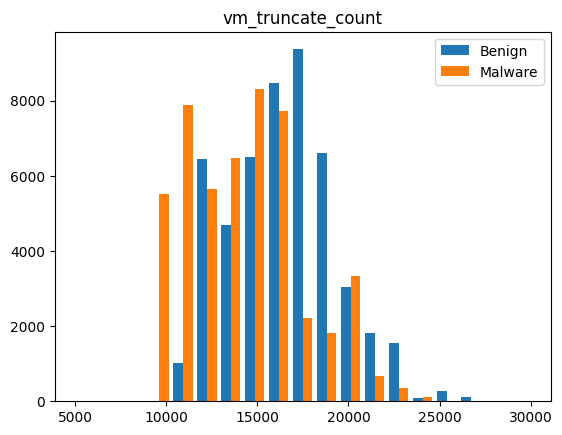

In [15]:
# Histogram penyebaran data benign dan malware pada fitur vm_truncate_count.
x = BenignData["vm_truncate_count"]
y = MalwareData["vm_truncate_count"]
bins = np.linspace(5000, 30000, 20) # Berbeda karena mayoritas data bernilai 5000 sampai 30000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("vm_truncate_count")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

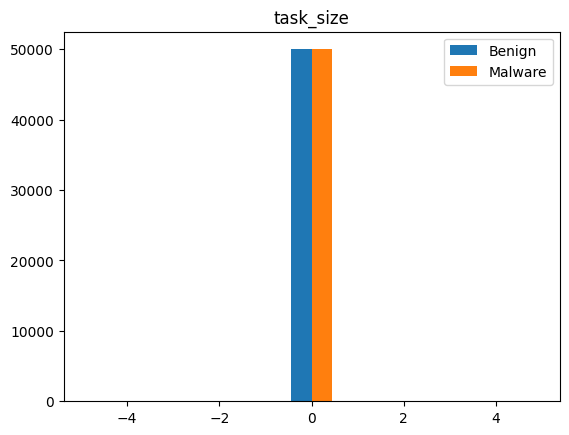

In [16]:
# Histogram penyebaran data benign dan malware pada fitur task_size.
x = BenignData["task_size"]
y = MalwareData["task_size"]
bins = np.linspace(-5, 5, 10) # Berbeda karena mayoritas data bernilai -5 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("task_size")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

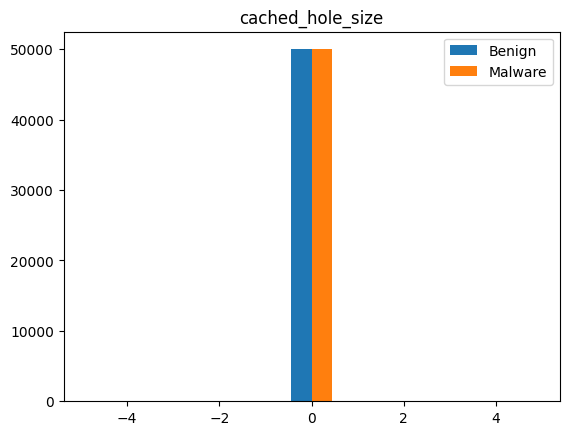

In [17]:
# Histogram penyebaran data benign dan malware pada fitur task_size.
x = BenignData["cached_hole_size"]
y = MalwareData["cached_hole_size"]
bins = np.linspace(-5, 5, 10) # Berbeda karena mayoritas data bernilai -5 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("cached_hole_size")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

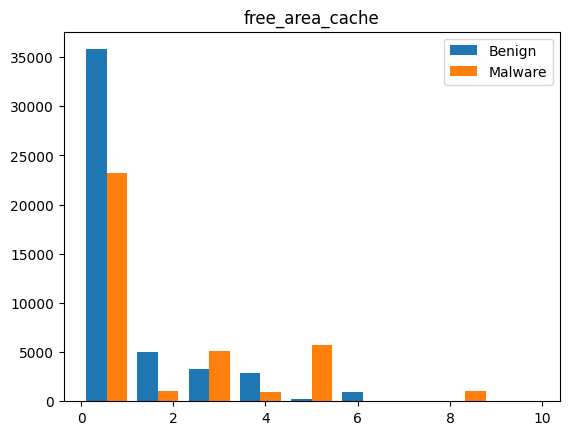

In [18]:
# Histogram penyebaran data benign dan malware pada fitur free_area_cache.
x = BenignData["free_area_cache"]
y = MalwareData["free_area_cache"]
bins = np.linspace(0, 10, 10) # Berbeda karena mayoritas data bernilai 0 sampai 10, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("free_area_cache")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

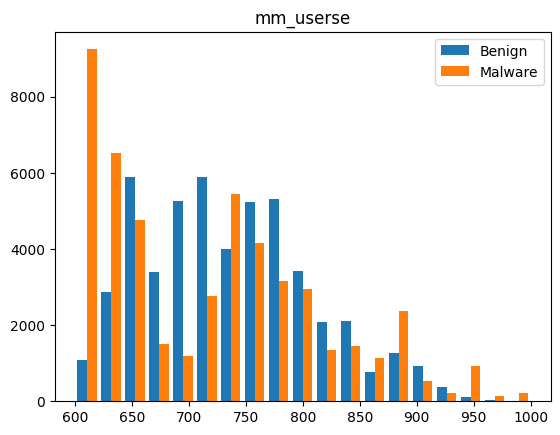

In [19]:
# Histogram penyebaran data benign dan malware pada fitur mm_users.
x = BenignData["mm_users"]
y = MalwareData["mm_users"]
bins = np.linspace(600, 1000, 20) # Berbeda karena mayoritas data bernilai 600 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("mm_userse")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

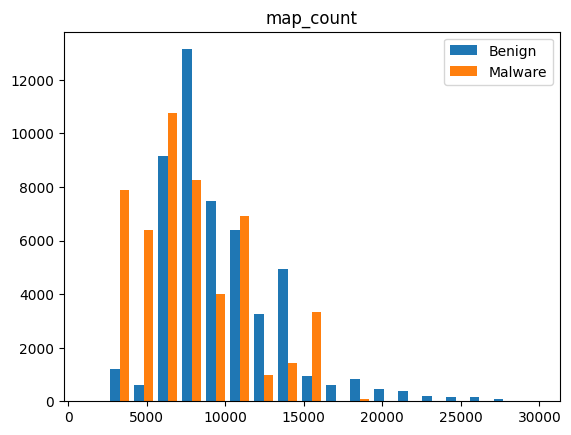

In [20]:
# Histogram penyebaran data benign dan malware pada fitur map_count.
x = BenignData["map_count"]
y = MalwareData["map_count"]
bins = np.linspace(1000, 30000, 20) # Berbeda karena mayoritas data bernilai 1000 sampai 30000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("map_count")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

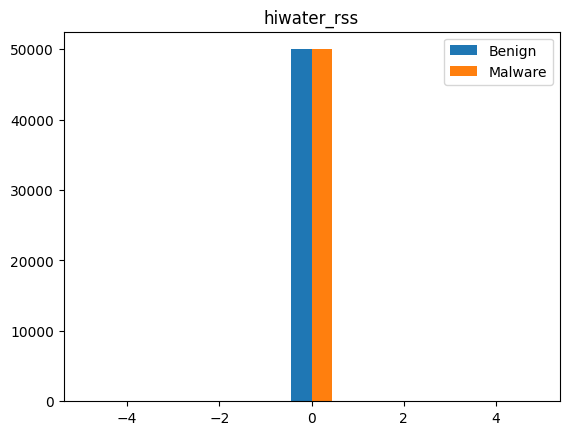

In [21]:
# Histogram penyebaran data benign dan malware pada fitur hiwater_rss.
x = BenignData["hiwater_rss"]
y = MalwareData["hiwater_rss"]
bins = np.linspace(-5, 5, 10) # Berbeda karena mayoritas data bernilai -5 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("hiwater_rss")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

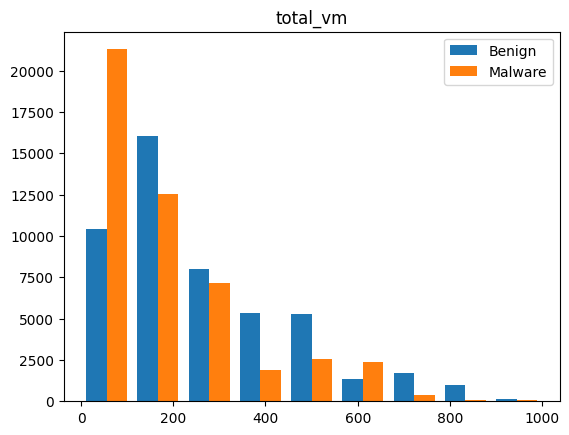

In [22]:
# Histogram penyebaran data benign dan malware pada fitur total_vm.
x = BenignData["total_vm"]
y = MalwareData["total_vm"]
bins = np.linspace(0, 1000, 10) # Berbeda karena mayoritas data bernilai 0 sampai 1000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("total_vm")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

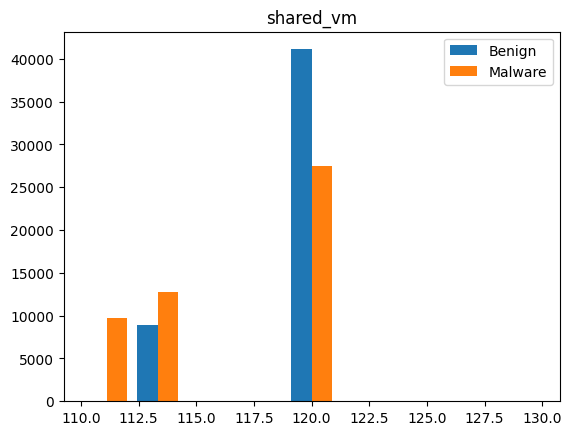

In [23]:
# Histogram penyebaran data benign dan malware pada fitur shared_vm.
x = BenignData["shared_vm"]
y = MalwareData["shared_vm"]
bins = np.linspace(110, 130, 10) # Berbeda karena mayoritas data bernilai 110 sampai 130, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("shared_vm")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

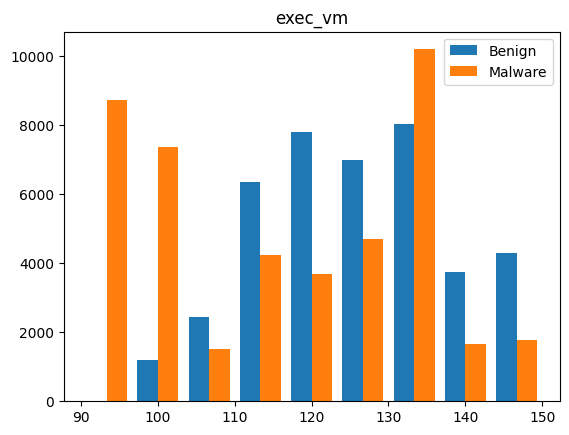

In [24]:
# Histogram penyebaran data benign dan malware pada fitur exec_vm.
x = BenignData["exec_vm"]
y = MalwareData["exec_vm"]
bins = np.linspace(90, 150, 10) # Berbeda karena mayoritas data bernilai 90 sampai 150, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("exec_vm")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

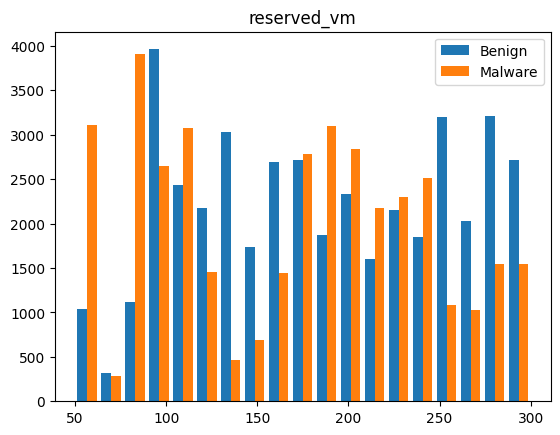

In [25]:
# Histogram penyebaran data benign dan malware pada fitur reserved_vm.
x = BenignData["reserved_vm"]
y = MalwareData["reserved_vm"]
bins = np.linspace(50, 300, 20) # Berbeda karena mayoritas data bernilai 50 sampai 300, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("reserved_vm")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

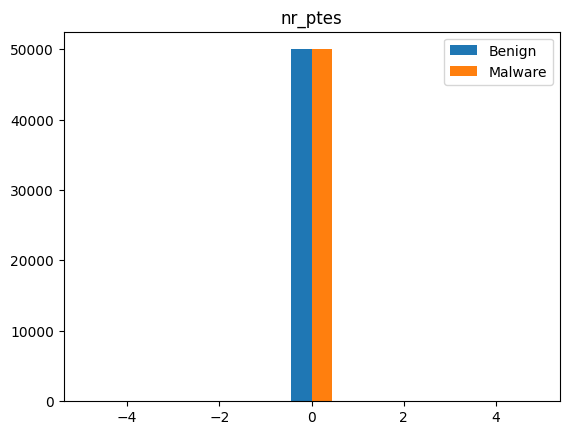

In [26]:
# Histogram penyebaran data benign dan malware pada fitur nr_ptes.
x = BenignData["nr_ptes"]
y = MalwareData["nr_ptes"]
bins = np.linspace(-5, 5, 10) # Berbeda karena mayoritas data bernilai -5 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("nr_ptes")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

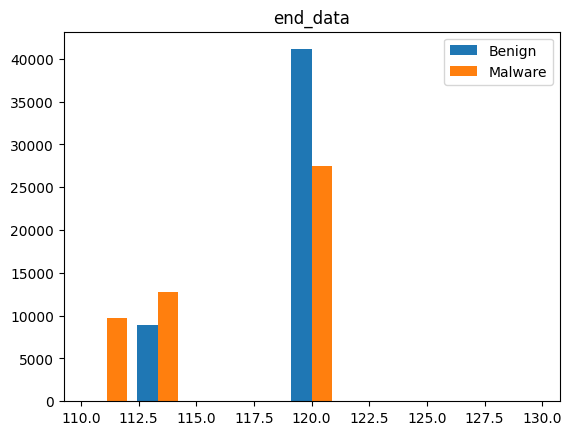

In [27]:
# Histogram penyebaran data benign dan malware pada fitur end_data.
x = BenignData["end_data"]
y = MalwareData["end_data"]
bins = np.linspace(110, 130, 10) # Berbeda karena mayoritas data bernilai 110 sampai 130, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("end_data")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

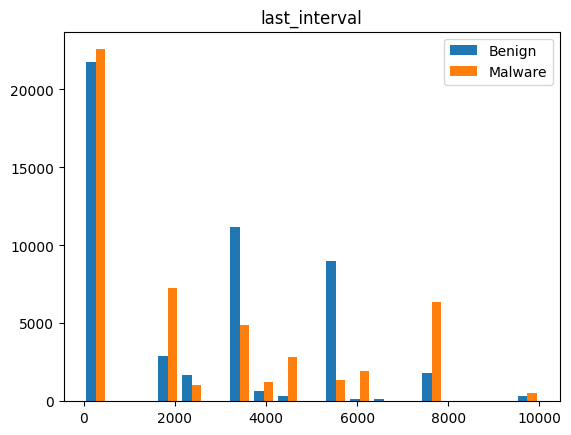

In [28]:
# Histogram penyebaran data benign dan malware pada fitur last_interval.
x = BenignData["last_interval"]
y = MalwareData["last_interval"]
bins = np.linspace(0, 10000, 20) # Berbeda karena mayoritas data bernilai 0 sampai 10000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("last_interval")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

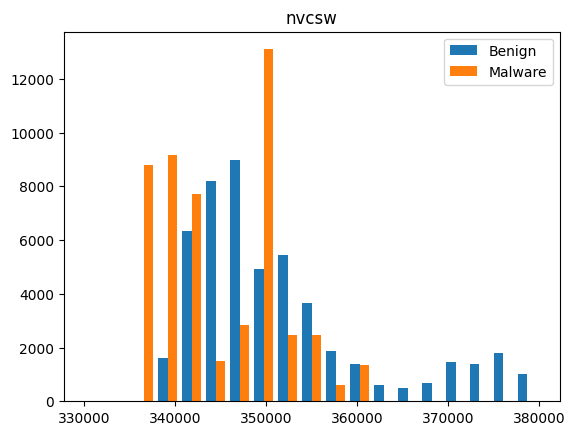

In [29]:
# Histogram penyebaran data benign dan malware pada fitur nvcsw.
x = BenignData["nvcsw"]
y = MalwareData["nvcsw"]
bins = np.linspace(330000, 380000, 20) # Berbeda karena mayoritas data bernilai 330000 sampai 380000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("nvcsw")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

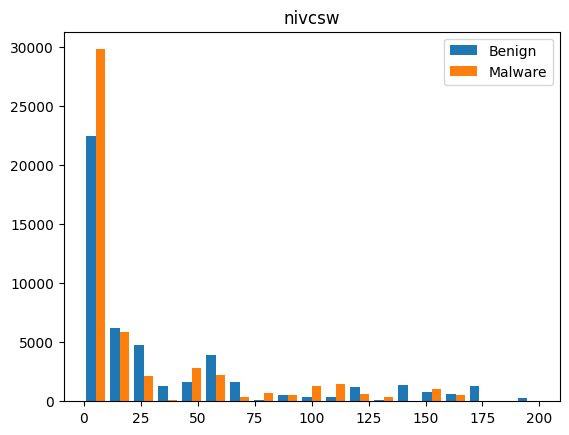

In [30]:
# Histogram penyebaran data benign dan malware pada fitur nivcsw.
x = BenignData["nivcsw"]
y = MalwareData["nivcsw"]
bins = np.linspace(0, 200, 20) # Berbeda karena mayoritas data bernilai 0 sampai 200, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("nivcsw")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

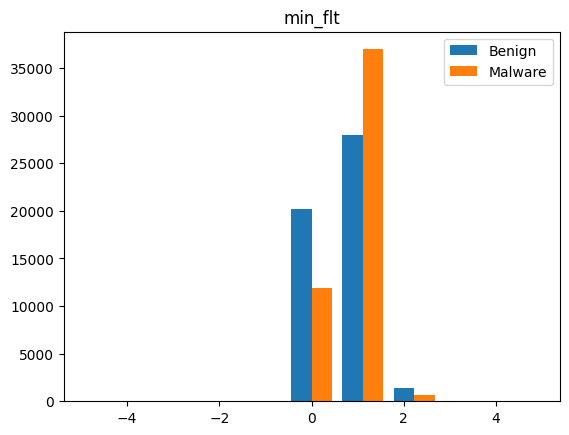

In [31]:
# Histogram penyebaran data benign dan malware pada fitur min_flt.
x = BenignData["min_flt"]
y = MalwareData["min_flt"]
bins = np.linspace(-5, 5, 10) # Berbeda karena mayoritas data bernilai -5 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("min_flt")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

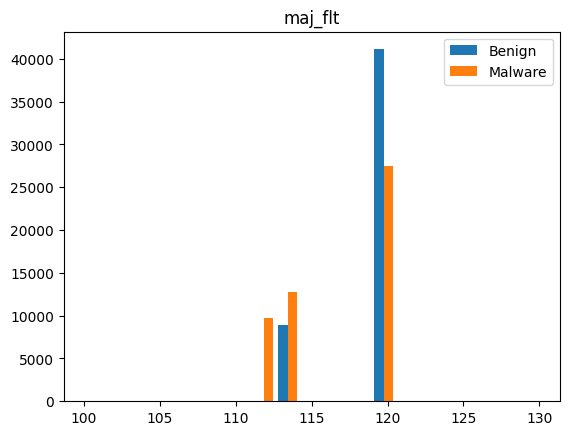

In [32]:
# Histogram penyebaran data benign dan malware pada fitur maj_flt.
x = BenignData["maj_flt"]
y = MalwareData["maj_flt"]
bins = np.linspace(100, 130, 20) # Berbeda karena mayoritas data bernilai 100 sampai 130, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("maj_flt")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

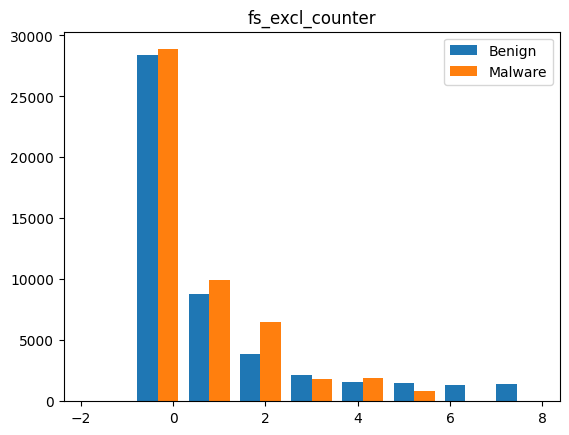

In [33]:
# Histogram penyebaran data benign dan malware pada fitur fs_excl_counter.
x = BenignData["fs_excl_counter"]
y = MalwareData["fs_excl_counter"]
bins = np.linspace(-2, 8, 10) # Berbeda karena mayoritas data bernilai -5 sampai 5, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("fs_excl_counter")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

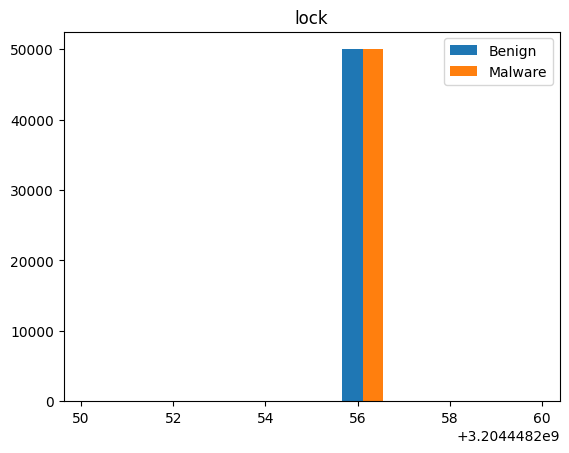

In [34]:
# Histogram penyebaran data benign dan malware pada fitur lock.
x = BenignData["lock"]
y = MalwareData["lock"]
bins = np.linspace(3204448250, 3204448260, 10) # Berbeda karena mayoritas data bernilai 3204448250 sampai 3204448260, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("lock")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

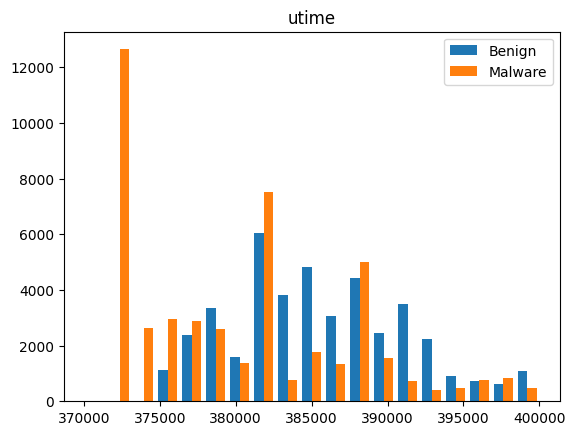

In [35]:
# Histogram penyebaran data benign dan malware pada fitur utime.
x = BenignData["utime"]
y = MalwareData["utime"]
bins = np.linspace(370000, 400000, 20) # Berbeda karena mayoritas data bernilai 370000 sampai 400000, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("utime")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

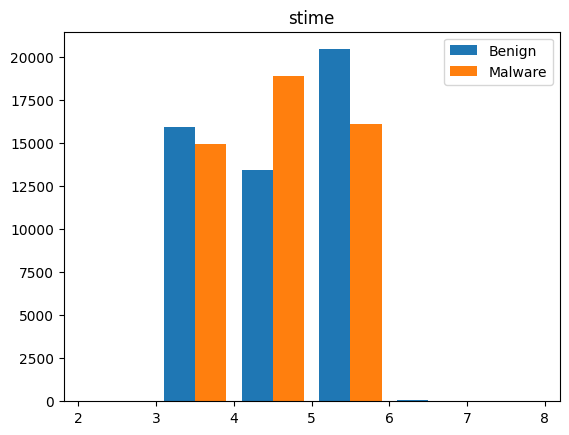

In [36]:
# Histogram penyebaran data benign dan malware pada fitur stime.
x = BenignData["stime"]
y = MalwareData["stime"]
bins = np.linspace(2, 8, 7) # Berbeda karena mayoritas data bernilai 2 sampai 8, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("stime")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

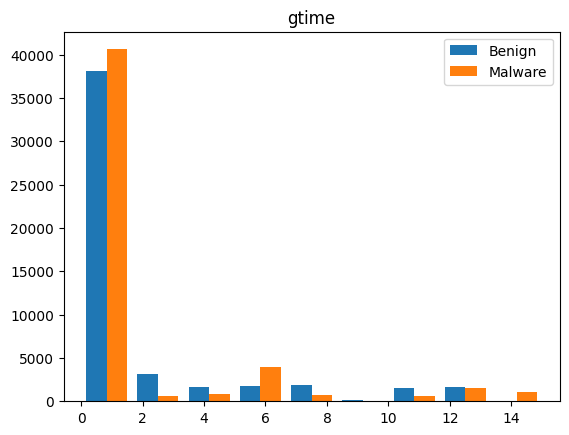

In [37]:
# Histogram penyebaran data benign dan malware pada fitur gtime.
x = BenignData["gtime"]
y = MalwareData["gtime"]
bins = np.linspace(0, 15, 10) # Berbeda karena mayoritas data bernilai 0 sampai 15, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("gtime")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

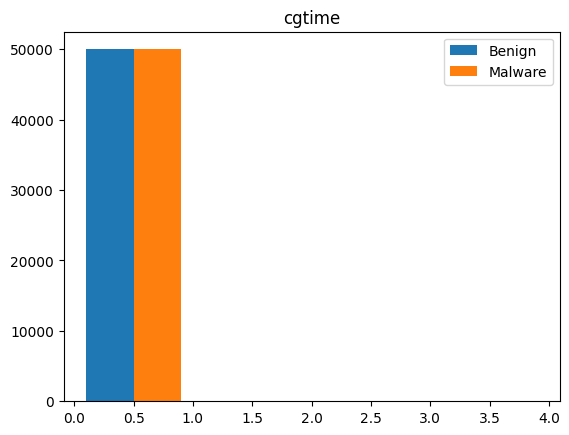

In [38]:
# Histogram penyebaran data benign dan malware pada fitur cgtime.
x = BenignData["cgtime"]
y = MalwareData["cgtime"]
bins = np.linspace(0, 4, 5) # Berbeda karena mayoritas data bernilai 0 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("cgtime")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

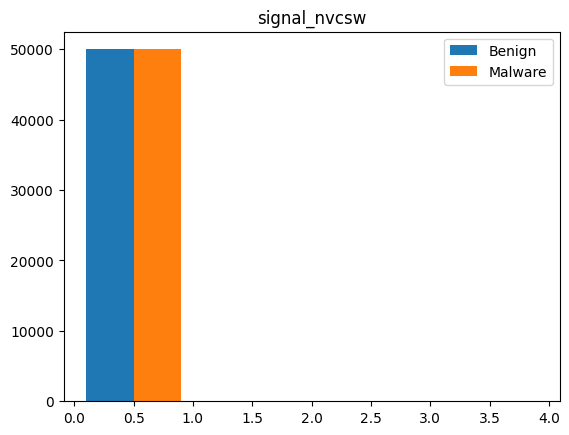

In [39]:
# Histogram penyebaran data benign dan malware pada fitur signal_nvcsw.
x = BenignData["signal_nvcsw"]
y = MalwareData["signal_nvcsw"]
bins = np.linspace(0, 4, 5) # Berbeda karena mayoritas data bernilai 0 sampai 4, jika menggunakan min max, visualisasi tidak maksimal, dilihat dengan menggunakan DM.describe)

plt.title("signal_nvcsw")
plt.hist([x,y], bins, label=['Benign', 'Malware'])
plt.legend(loc='upper right')
plt.show()

In [40]:
# Memilih dan menentukan feature yang berpotensi untuk threshold (Penyebarannya sangat terlihat dan 2 class dapat dipisahkan dengan mudah)
Dataset = DM.drop(['hash', 'millisecond','classification', 'state', 'usage_counter', 'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache', 'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],axis=1).values # mendrop yang penyebarannya sangat kecil atau tidak dapat membendakan 2 class
Target = DM['classification'].values # CLass karena merepresentasikan binary class

In [41]:
# Memilih 5% data secara acak dari setiap fitur/column
sample_size = int(0.05 * len(DM))
sampled_data = DM.groupby('classification').apply(lambda x: x.iloc[:sample_size]).reset_index(drop=True)

In [42]:
# Menampilkan list feature yang digunakan
Features = sampled_data.drop(['hash','millisecond','classification', 'state', 'usage_counter', 'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache', 'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],axis=1).columns.tolist()
print("         List Features yang akan dibandingkan kinerja-nya           ")
print("                                                                    ")
print("#   Column                                  Non-Null Count  Dtype   ")
print("---  ------                                  --------------  -----  ")
for i, column_name in enumerate(Features):
    print(f"{i+1:3} {column_name:40} {sampled_data[column_name].count():<15} {sampled_data[column_name].dtype}")

         List Features yang akan dibandingkan kinerja-nya           
                                                                    
#   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----  
  1 nvcsw                                    10000           int64
  2 utime                                    10000           int64


In [43]:
import time

hasil_threshold = []

def Thresholding(threshold, feature):
    start_time = time.time()  # Mulai menghitung waktu

    # Melakukan thresholding
    BenignDataThreshold = sampled_data[sampled_data[feature] > int(threshold)]
    MalwareDataThreshold = sampled_data[sampled_data[feature] <= int(threshold)]

    # Menentukan TP, TN, FP, FN
    from sklearn.metrics import confusion_matrix

    # Untuk BenignDataThreshold
    y_true_benign = ["benign"] * len(BenignDataThreshold)
    y_pred_benign = BenignDataThreshold["classification"]

    # Untuk MalwareDataThreshold
    y_true_malware = ["malware"] * len(MalwareDataThreshold)
    y_pred_malware = MalwareDataThreshold["classification"]

    # Menyatukan true labels dan predicted labels
    y_true = y_true_benign + y_true_malware
    y_pred = y_pred_benign.tolist() + y_pred_malware.tolist()

    # Menghitung confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Menghitung Precision, Recall, F1-score, dan Accuracy
    PrecisionThreshold = tp/(tp+fp) if (tp+fp) != 0 else 0
    RecallThreshold = tp/(tp+fn) if (tp+fn) != 0 else 0
    F1ScoreThreshold = 2 * ((PrecisionThreshold*RecallThreshold)/(PrecisionThreshold+RecallThreshold)) if (PrecisionThreshold+RecallThreshold) != 0 else 0
    AccuracyThreshold = (tp+tn)/(tp+fp+tn+fn) if (tp+fp+tn+fn) != 0 else 0

    end_time = time.time()  # Akhir waktu
    ExecutionTime = end_time - start_time  # Menghitung durasi eksekusi

    matrix = [[feature, threshold], [PrecisionThreshold], [RecallThreshold], [F1ScoreThreshold], [AccuracyThreshold], [ExecutionTime]]
    hasil_threshold.append(matrix)

for feature in tqdm(Features, desc='Progress'):
    Max = sampled_data[feature].max()
    Min = sampled_data[feature].min()

    for x in range(int(Min), int(Max + 1)):
        Thresholding(x, feature)

print(hasil_threshold)


Progress: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [26:02<00:00, 781.05s/it]IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




In [44]:
# Inisialisasi variabel winner untuk masing-masing metrik
winner_precision = [['', 0], [0], [0], [0], [0], [0]]
winner_recall = [['', 0], [0], [0], [0], [0], [0]]
winner_f1_score = [['', 0], [0], [0], [0], [0], [0]]
winner_accuracy = [['', 0], [0], [0], [0], [0], [0]]
winner_run_time = [['', 0], [0], [0], [0], [0], [float('inf')]]  # Memilih yang terendah, jadi diinisialisasi dengan tak hingga

for result in hasil_threshold:
    # Membandingkan Precision
    if result[1][0] > winner_precision[1][0]:
        winner_precision = result
    
    # Membandingkan Recall
    if result[2][0] > winner_recall[2][0]:
        winner_recall = result

    # Membandingkan F1-score
    if result[3][0] > winner_f1_score[3][0]:
        winner_f1_score = result

    # Membandingkan Accuracy
    if result[4][0] > winner_accuracy[4][0]:
        winner_accuracy = result

    # Membandingkan waktu running (run_time) untuk threshold tercepat (terkecil)
    if result[5][0] < winner_run_time[5][0]:
        winner_run_time = result

In [45]:
# Fungsi untuk memfilter dan plot berdasarkan pemenang
def plot_metrics_for_winner(winner, metric_name):
    winner_feature, winner_threshold = winner[0]

    # Memfilter hasil threshold untuk fitur pemenang
    winner_results = [result for result in hasil_threshold if result[0][0] == winner_feature]

    # Pisahkan hasil menjadi list berdasarkan threshold dan kolom metrik
    thresholds, precision, recall, f1_score, accuracy = [], [], [], [], []
    for result in winner_results:
        thresholds.append(result[0][1])
        precision.append(result[1][0])
        recall.append(result[2][0])
        f1_score.append(result[3][0])
        accuracy.append(result[4][0])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, accuracy, label='Accuracy')
    plt.plot(thresholds, precision, label='Precision')
    plt.plot(thresholds, recall, label='Recall')
    plt.plot(thresholds, f1_score, label='F1 Score')

    plt.title(f'{metric_name} Winner: Metrics vs. Threshold for Feature {winner_feature}')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

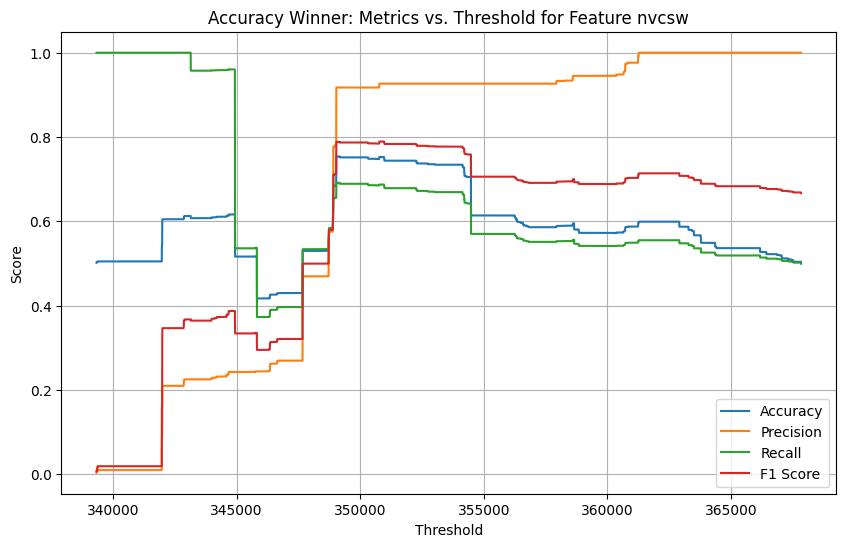

In [46]:
# Plot untuk Accuracy Winner
plot_metrics_for_winner(winner_accuracy, 'Accuracy')

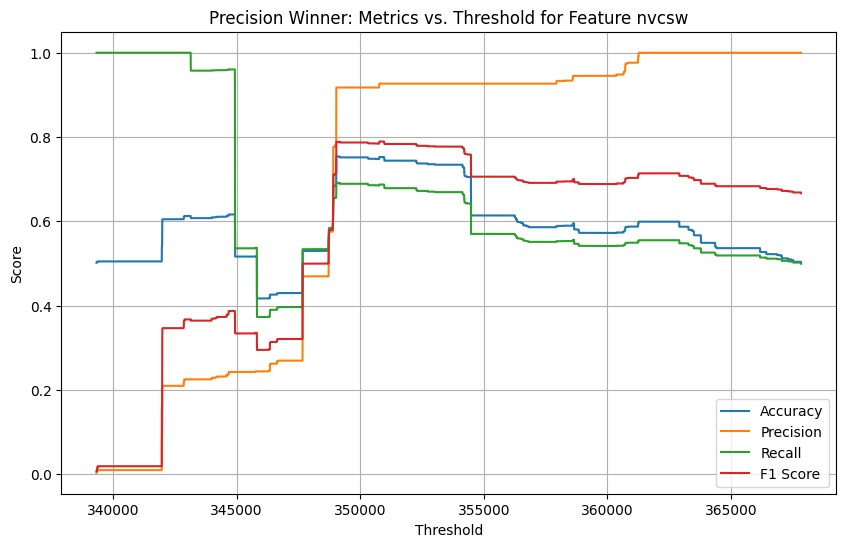

In [47]:
# Plot untuk Precision Winner
plot_metrics_for_winner(winner_precision, 'Precision')

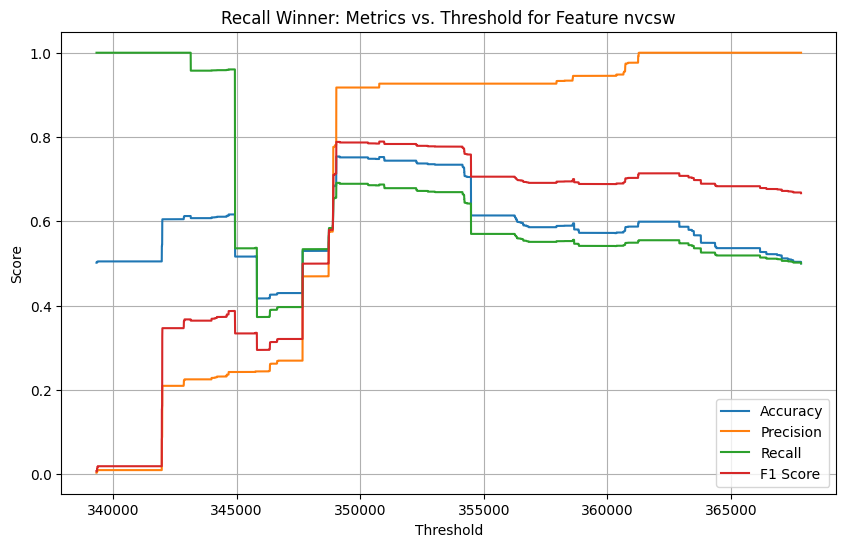

In [48]:
# Plot untuk Recall Winner
plot_metrics_for_winner(winner_recall, 'Recall')

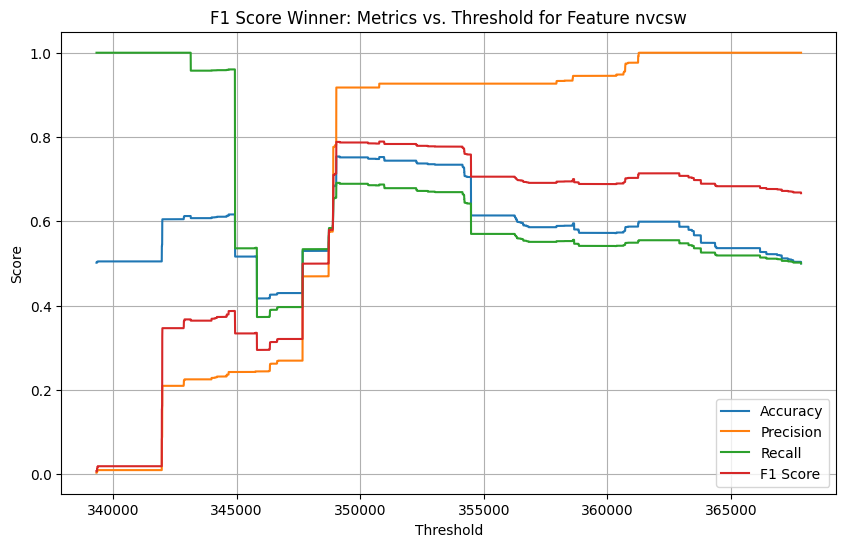

In [49]:
# Plot untuk F1-Score Winner
plot_metrics_for_winner(winner_f1_score, 'F1 Score')

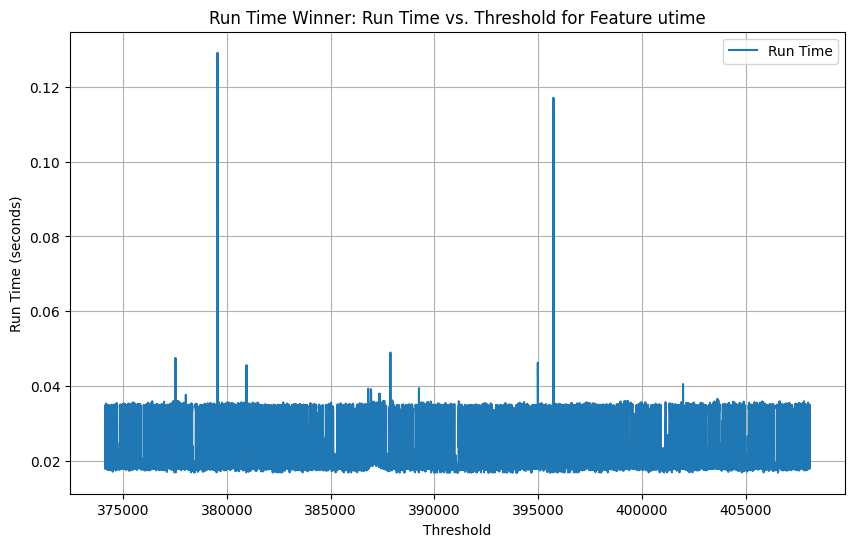

In [50]:
def plot_runtime_for_winner(winner):
    winner_feature, winner_threshold = winner[0]

    # Memfilter hasil threshold untuk fitur pemenang
    winner_results = [result for result in hasil_threshold if result[0][0] == winner_feature]

    # Pisahkan hasil menjadi list berdasarkan threshold dan run_time
    thresholds, run_time = [], []
    for result in winner_results:
        thresholds.append(result[0][1])
        run_time.append(result[5][0])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, run_time, label='Run Time')

    plt.title(f'Run Time Winner: Run Time vs. Threshold for Feature {winner_feature}')
    plt.xlabel('Threshold')
    plt.ylabel('Run Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot untuk Run Time Winner
plot_runtime_for_winner(winner_run_time)

In [51]:
# Output untuk setiap metrik
print(f"Precision terbaik dicapai dengan fitur {winner_precision[0][0]} dan threshold {winner_precision[0][1]}, menghasilkan precision {winner_precision[1][0]}.")
print(f"Recall terbaik dicapai dengan fitur {winner_recall[0][0]} dan threshold {winner_recall[0][1]}, menghasilkan recall {winner_recall[2][0]}.")
print(f"F1-score terbaik dicapai dengan fitur {winner_f1_score[0][0]} dan threshold {winner_f1_score[0][1]}, menghasilkan F1-score {winner_f1_score[3][0]}.")
print(f"Akurasi terbaik dicapai dengan fitur {winner_accuracy[0][0]} dan threshold {winner_accuracy[0][1]}, menghasilkan akurasi {winner_accuracy[4][0]}.")
print(f"Waktu running tercepat dicapai dengan fitur {winner_run_time[0][0]} dan threshold {winner_run_time[0][1]}, dengan waktu running {winner_run_time[5][0]} detik.")

Precision terbaik dicapai dengan fitur nvcsw dan threshold 361275, menghasilkan precision 1.0.
Recall terbaik dicapai dengan fitur nvcsw dan threshold 339334, menghasilkan recall 1.0.
F1-score terbaik dicapai dengan fitur nvcsw dan threshold 350768, menghasilkan F1-score 0.7891330267416113.
Akurasi terbaik dicapai dengan fitur nvcsw dan threshold 349030, menghasilkan akurasi 0.7537.
Waktu running tercepat dicapai dengan fitur utime dan threshold 388556, dengan waktu running 0.01691460609436035 detik.
